In [1]:
# uncomment these to filter Matplotlib deprecation warnings for sympy
import warnings
warnings.filterwarnings('ignore')

The unitstep function gives a unit impulse at a given value $t$. 

For $x <= t$ unitstep(x) = 0. Otherwise, initstep(x) = 1.

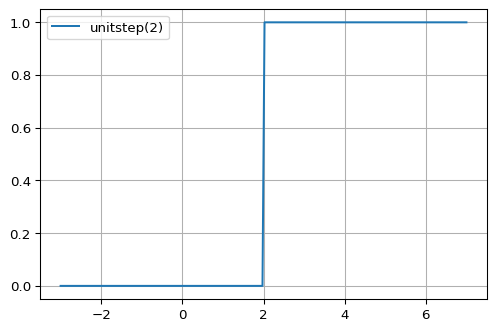

In [10]:
import numpy as np
import matplotlib.pyplot as plt
def unitstep(t):
  u = np.arange(t.shape[0])
  lcv = np.arange(t.shape[0])
  for place in lcv:
    if t[place] > 0 + c:
      u[place] = 1
    else:
      u[place] = 0
  return u

c = 2

t = np.linspace(c - 5,c + 5,200)
fig, ax = plt.subplots(dpi=96)
ax.plot(t, unitstep(t), label="unitstep(" + str(c) + ")")
ax.grid()
ax.legend();

The derivative of the unitstep function is the DiracDelta function. It has some interesting properties shown here.

In [3]:
from sympy import *
# init_printing(use_unicode=False, wrap_line=False)
print('DiracDelta(x) for any value but 0 is 0:')
print(DiracDelta(-1))
print(DiracDelta(1))
print('\nDiracDelta(0) is undefined. In at least some versions of Sympy, it is unevaluated:')
print(DiracDelta(0),'\n')
x, d = symbols('x d')
h = 0.0001
print('Integrating DiracDelta(x) for bounds that include x in the interval produces 1:')
sol1 = integrate(DiracDelta(x - d), (x, d-h, d+h))
print(sol1)
sol2 = integrate(DiracDelta(x - d), (x, -oo, d+h))
print(sol2)
sol3 = integrate(DiracDelta(x - d), (x, d-h, oo))
print(sol3,'\n')
print('Integrating DiracDelta(x) using bounds that don\'t include x in the interval produces 0:')
sol4 = integrate(DiracDelta(x - d), (x, -oo, d-h))
print(sol4)
sol5 = integrate(DiracDelta(x - d), (x, d+h, oo))
print(sol5,'\n')
print('Integrating DiracDelta(x) when one of the bounds is 0 produces Heaviside(0), which is defined to be 1/2. \nBut some versions of Sympy don\'t evalute this:')
sol6 = integrate(DiracDelta(x - d), (x, -oo, d))
print(sol6)
sol7 = integrate(DiracDelta(x - d), (x, d, oo))
print(sol7,'\n')
print('Heaviside(x) = 1 for x > 0, -1 for x < 0, and 1/2 for x = 0. \nBut some versions of Sympy don\'t evaluate Heaviside(0):')
print(Heaviside(1))
print(Heaviside(-1))
print(Heaviside(0))

DiracDelta(x) for any value but 0 is 0:
0
0

DiracDelta(0) is undefined. In at least some versions of Sympy, it is unevaluated:
DiracDelta(0) 

Integrating DiracDelta(x) for bounds that include x in the interval produces 1:
1
1
1 

Integrating DiracDelta(x) using bounds that don't include x in the interval produces 0:
0
0 

Integrating DiracDelta(x) when one of the bounds is 0 produces Heaviside(0), which is defined to be 1/2. 
But some versions of Sympy don't evalute this:
Heaviside(0)
1 - Heaviside(0) 

Heaviside(x) = 1 for x > 0, -1 for x < 0, and 1/2 for x = 0. 
But some versions of Sympy don't evaluate Heaviside(0):
1
0
Heaviside(0)


Here is an example forced differential equation involving DiracDelta with analytic and graphical solutions:

$\hspace{0.5in} y'(t) + 0.45y(t) = 8\mathrm{DiracDelta}(t-4)$ for $y(0) = 9$

In [4]:
init_printing()
from sympy.plotting import plot
t = symbols('t')
y = Function('y')
y1 = Derivative(y(t), t)
eqdiff = y1 + 0.45*y(t) - 8*DiracDelta(t - 4)
sol1 = dsolve(eqdiff, y(t), ics={y(0): '9'})
sol1

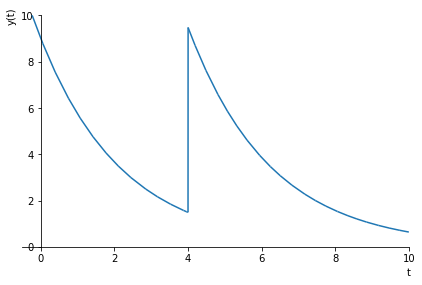

In [5]:
xtol = 1e-3
p1 = plot(sol1.rhs, show=False, xlim=[-0.5,10], ylim=[0,10], ylabel='y(t)')
p1.show()

The DiracDelta function provides an impulse of 8 units at $t = 4$.

In the following function, an impulse of $d$ units for integral values on the interval $1 <= t <= 9$.

$\hspace{0.5in} y'(t) + 0.04y(t) = \sum_{k=1}^{9}d\mathrm{DiracDelta}(t-k)$ for $y(0) = 1000$

In [6]:
t, k = symbols('t k')
y = Function('y')
y1 = Derivative(y(t), t)
r = 0.04
yinit = 1000
d = 200
f = Sum(d*DiracDelta(t - k),(k,1,9)).doit()
# print(f)
eqdiff = y1 - r*y(t) - f
#print(eqdiff)
sol2 = dsolve(eqdiff, y(t), ics={y(0): yinit})
sol2

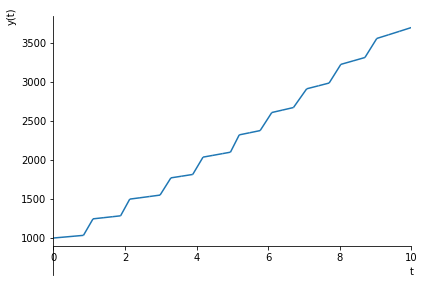

In [7]:
xtol = 1e-3
p2 = plot(sol2.rhs, show=False, xlim=[0,10], axis_center=(0,900), ylabel='y(t)')
p2.show()

A comparison to a constant forcing function of 200:

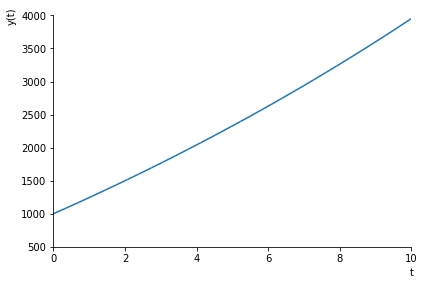

In [8]:
t = symbols('t')
y = Function('y')
y1 = Derivative(y(t), t)
eqdiff = y1 - 0.04*y(t) - 200
sol3 = dsolve(eqdiff, y(t), ics={y(0): '1000'})
xtol = 1e-3
p3 = plot(sol3.rhs, show=False, xlim=[0,10], ylim=[500,4000], axis_center=(0,500), ylabel='y(t)')
p3.show()

Written by Dan Liddell. October, 2021.

These sources were consulted in preparing this content and provided ideas, examples, and source code for this material:

https://personal.math.ubc.ca/~pwalls/math-python/

https://www.scipy.org/docs.html

https://stackexchange.com/

https://stackoverflow.com/

A generous amount of credit goes to the following:

    Davis, Bill and Jerry Uhl. Differential Equations&Mathematica [sic]. version 6.0. 
    Math Everywhere, Inc., 2007. Published as a Mathematica notebook. 

    Math 285 -- Introduction to Differential Equations course at University of Illinois at Urbana-Champaign.